In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
%matplotlib inline
import seaborn as sns
sns.set()

In [7]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

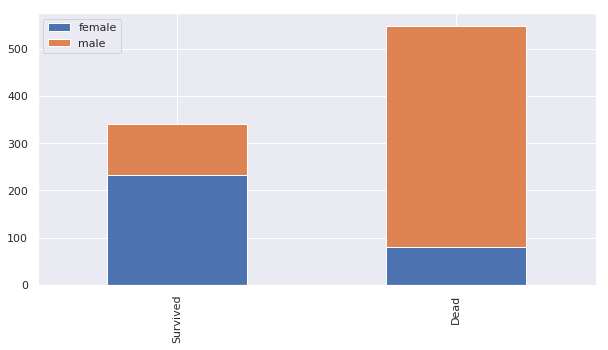

In [8]:
bar_chart('Sex')

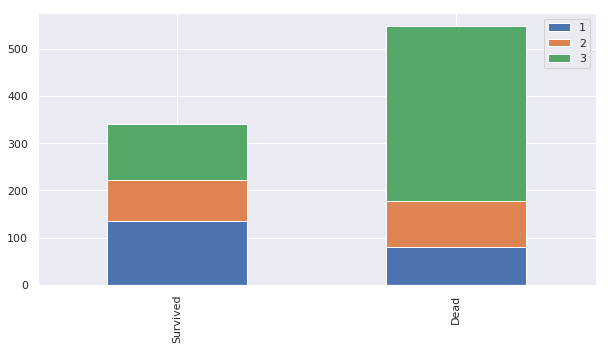

In [9]:
bar_chart('Pclass')

## Feature Engineering

Feature engineering is the process of using the domain knowledge of the data to create features *(Feature Vectors)* that make machine learning algorithms work.

Feature vector is an n-dimensional vecxtor of numerical features that represent some object. Many algorithms in machine learning require a numerical representation of objects sunce such representations facilitate processing and statistical analysis.

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
from IPython.display import Image

In [12]:
Image(url="https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [13]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
test = pd.read_csv("test.csv")

### Cleaning the data & Creating new Features

To start, we're going to take the name column from the dataset given. The usful information we can extract from this is the persons _title_ (Mr, Mrs, Sir) etc. We can use this information to get better insight and understanding into each person.

In [15]:
# Combine training and test data
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [16]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Lady          1
Sir           1
Mme           1
Countess      1
Don           1
Capt          1
Ms            1
Jonkheer      1
Name: Title, dtype: int64

#### *Map the data*

From here, we can now map the data to our own new feature. This is done because when we get to classifying the data, it needs numerical values to do so.

In [17]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, 
                 "Dr": 3, "Rev": 3, "Major": 3, "Col": 3, 
                 "Mlle": 3, "Col": 3, "Capt": 3, "Lady": 3, 
                 "Sir": 3, "Mme": 3, "Ms": 3, "Countess": 3, 
                 "Jonkheer": 3, "Don": 3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [18]:
train['Title'].fillna(3, inplace=True)
test['Title'].fillna(3, inplace=True)

In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


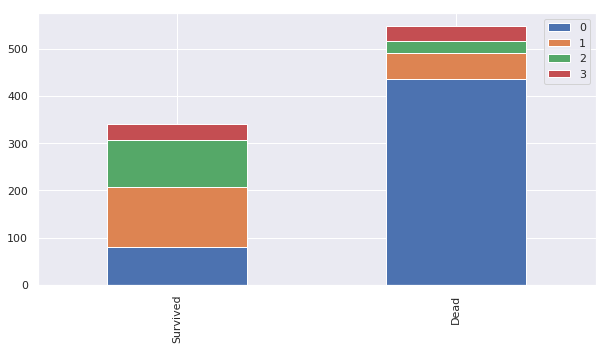

In [20]:
bar_chart('Title')

In [21]:
# remove name field from dataset as we no longer need it
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
sex_mapping = {"male": 0, "female": 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0


### Age

Some peoples age is missing throughout the dataset. To rectify this, we will take the median age of the dataset and use that to fill in the blanks where the persons age is missing.

As an example. If a persons age is missing and they have a title of *Mr*, then we will grouby the *Mr* title and use the median age of that title to put in place for the missing value.

In [24]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.00,1,0,7.2500,NaN,S,0
1,2,1,1,1,38.00,1,0,71.2833,C85,C,2
2,3,1,3,1,26.00,0,0,7.9250,NaN,S,1
3,4,1,1,1,35.00,1,0,53.1000,C123,S,2
4,5,0,3,0,35.00,0,0,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,8.4583,NaN,Q,0
6,7,0,1,0,54.00,0,0,51.8625,E46,S,0
7,8,0,3,0,2.00,3,1,21.0750,NaN,S,3
8,9,1,3,1,27.00,0,2,11.1333,NaN,S,2
9,10,1,2,1,14.00,1,0,30.0708,NaN,C,2


In [25]:
# Fill missing age with median age for each persons title (Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

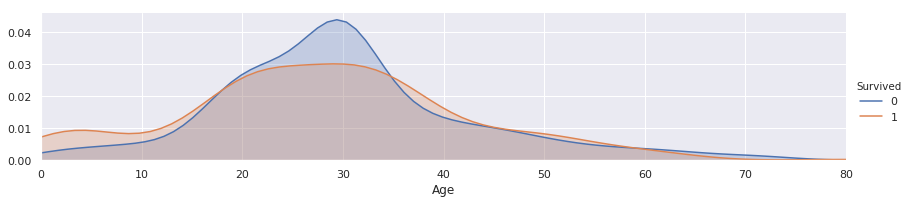

In [26]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

### Creating a Feature Vector map for persons age

Binning/Converting numerical age to categorical variable

{child: 0, young: 1, adult: 2, mid-age: 3, senior: 4}

In [27]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age' ] = 0,
    dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age' ] = 1,
    dataset.loc[ (dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age' ] = 2,
    dataset.loc[ (dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age' ] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age' ] = 4

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,8.0500,NaN,S,0


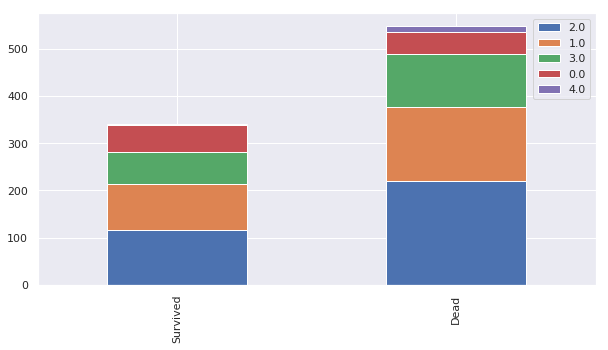

In [28]:
bar_chart('Age')

### Embarked and Class

Let's try and compare and thus create a feature telling us about a users class and which place they embarked at.

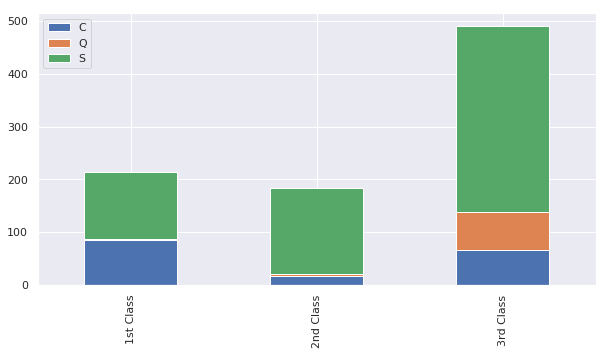

In [29]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
# Create an index so we know what is what
df.index = ['1st Class', '2nd Class', '3rd Class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

There is some data missing for the persons embarkation, thus, we can fill in that missing data with what we can assume is given the amount of passengers embarked from **S** or **Southhampton**.

In [30]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,8.0500,NaN,S,0


### Persons Fare

We can fill in the missing fares with the median fare for each **Pclass**

In [31]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)

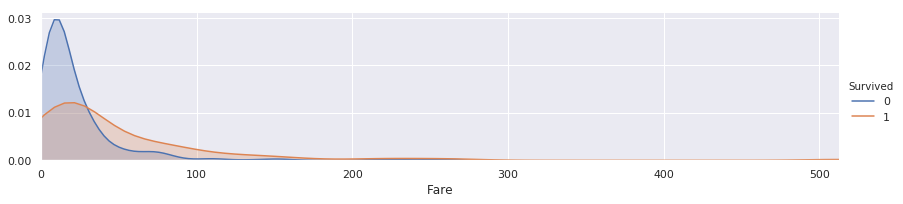

In [32]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

In [33]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare' ] = 0,
    dataset.loc[ (dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare' ] = 1,
    dataset.loc[ (dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare' ] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare' ] = 3

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,0.0,NaN,S,0
1,2,1,1,1,3.0,1,0,2.0,C85,C,2
2,3,1,3,1,1.0,0,0,0.0,NaN,S,1
3,4,1,1,1,2.0,1,0,2.0,C123,S,2
4,5,0,3,0,2.0,0,0,0.0,NaN,S,0


In [35]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
D              3
E101           3
C22 C26        3
F2             3
B49            2
C93            2
F4             2
B58 B60        2
E67            2
D35            2
E8             2
D26            2
C125           2
C126           2
B20            2
F G73          2
D36            2
B5             2
C78            2
E44            2
B77            2
C92            2
C68            2
C65            2
E33            2
B22            2
              ..
A36            1
D46            1
B42            1
A26            1
B80            1
B73            1
A34            1
E49            1
B86            1
B82 B84        1
C91            1
D9             1
D19            1
B69            1
A32            1
F38            1
C110           1
F G63          1
A19            1
C45            1
A23            1
D50            1
D30            1
B71            1
C49            1
B3             1
E12            1
D10 D12       

In [36]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

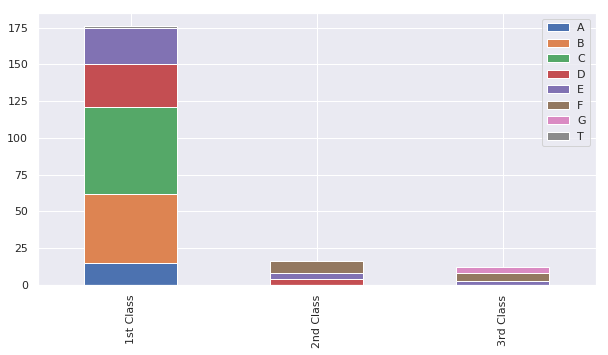

In [37]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st Class", "2nd Class", "3rd Class"]
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [38]:
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2, 'G': 2.4, 'T': 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,0.0,NaN,S,0
1,2,1,1,1,3.0,1,0,2.0,0.8,C,2
2,3,1,3,1,1.0,0,0,0.0,NaN,S,1
3,4,1,1,1,2.0,1,0,2.0,0.8,S,2
4,5,0,3,0,2.0,0,0,0.0,NaN,S,0


**Mapping Cabins** Fill in missing data for cabins by getting median

In [40]:
# fill missing Fare with median fare fro each pclass
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,0.0,2.0,S,0
1,2,1,1,1,3.0,1,0,2.0,0.8,C,2
2,3,1,3,1,1.0,0,0,0.0,2.0,S,1
3,4,1,1,1,2.0,1,0,2.0,0.8,S,2
4,5,0,3,0,2.0,0,0,0.0,2.0,S,0


### Family  Size
 - SibSp = Sibling
 - Parch = Parent & Child

In [42]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

(0, 11.0)

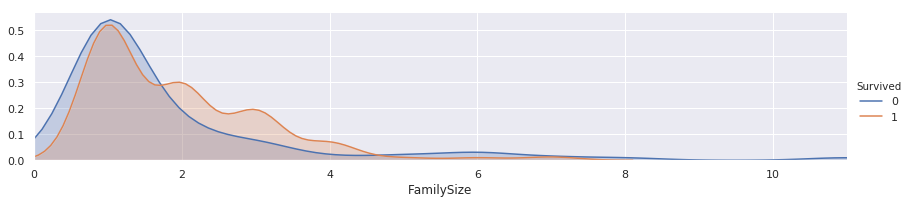

In [43]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

plt.xlim(0)

In [44]:
# Feature map embark
embark_mapping = {'C': 0, 'Q': 1, 'S': 3}

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embark_mapping)

In [45]:
# Drop un-necessary features
features_drop = ['SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [46]:
train_data = train.drop(['Survived'], axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [47]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,3,0,2
1,1,1,3.0,2.0,0.8,0,2,2
2,3,1,1.0,0.0,2.0,3,1,1
3,1,1,2.0,2.0,0.8,3,2,2
4,3,0,2.0,0.0,2.0,3,0,1


### Modelling the Data

In this final part, we will being modelling and classifying the data using 5 different types of classifiers.

In [48]:
#  Import classifier modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null int64
dtypes: float64(3), int64(6)
memory usage: 62.7 KB


### Cross Validation (K-Fold)


In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### KNN

In [51]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.7752809  0.82022472 0.82022472 0.85393258 0.82022472
 0.85393258 0.78651685 0.83146067 0.84269663]


In [52]:
# Get the average score for KNN
round(np.mean(score) * 100, 2)

82.04

### Decision Tree

In [53]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.80898876 0.7752809  0.7752809  0.8988764  0.7752809
 0.84269663 0.83146067 0.75280899 0.78651685]


In [54]:
# Average DT score
round(np.mean(score) * 100, 2)

80.14

### Random Forest

In [55]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.7752809  0.80898876 0.75280899 0.86516854 0.80898876
 0.79775281 0.80898876 0.73033708 0.79775281]


In [56]:
# Average RF score
round(np.mean(score) * 100, 2)

79.24

### Naive Bayes

In [57]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.75280899 0.7752809  0.75280899 0.70786517 0.80898876
 0.78651685 0.80898876 0.85393258 0.83146067]


In [58]:
# Average NB score
round(np.mean(score) * 100, 2)

79.34

### SVM

In [59]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.82022472 0.82022472 0.83146067 0.86516854]


In [60]:
# Average SVM score
round(np.mean(score) * 100, 2)

82.61

### Testing

In [62]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop('PassengerId', axis=1).copy()
prediction = clf.predict(test_data)

In [63]:
print(prediction)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [64]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': prediction
})

submission.to_csv('submission.csv', index=False)

In [65]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
